# I fucking hate panda bears!

In [76]:
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from datetime import datetime
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc
from dateutil import parser


plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
pd.set_option('display.max_columns', None)

In [77]:
# https://www.kaggle.com/datasets/kazanova/sentiment140
df = pd.read_csv('twitterdata.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(np.vstack([df.columns, df])) # Moves column names into row 1
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'tweet'] # Renames columns
df.replace({'sentiment': {4: 1}}, inplace=True) # Replaces all '4's with '1's in column 'sentiment'
# df['unix_time'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Z %Y', errors='coerce').astype(int) / 10**9
# df.dropna(subset=['unix_time'], inplace=True)
df.head()

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [78]:
df['unix_time'] = df['date'].apply(lambda x: parser.parse(x, tzinfos={"PDT": -7*3600}).timestamp())
df.head()

,sentiment,id,date,query,user,tweet,unix_time
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1.239082e+09
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,1.239082e+09
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,1.239082e+09
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,1.239082e+09
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",1.239082e+09


In [57]:
data_types_dict = {
    'sentiment': int,
    'id': float
}
df = df.astype(data_types_dict)
df.dtypes

sentiment      int32
id           float64
date          object
query         object
user          object
tweet         object
dtype: object

In [58]:
s = df.stack().value_counts()
print(s)

NO_QUERY                                                                                                                        1600000
0                                                                                                                                800000
1                                                                                                                                800000
lost_dog                                                                                                                            549
webwoke                                                                                                                             345
                                                                                                                                 ...   
Tue Jun 16 08:49:02 PDT 2009                                                                                                          1
we missed the we will rock you bit last night  c

<AxesSubplot:>

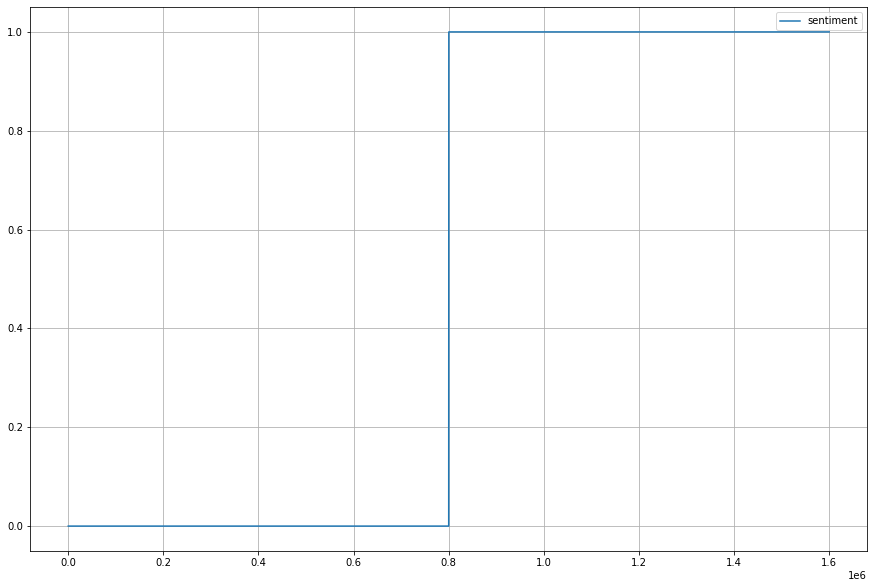

In [59]:
df1 = df
df1.plot(y='sentiment', use_index='true', figsize=(15,10), grid=True)